# Лабораторная работа №3

### Выполнил Рыбаков Владислав, БПМ201, 30 вариант

Задания 3.1.30, 3.4, 3.9.6**

### Задание 3.1.30

Дана система уравнений Ax=b порядка n. Исследовать зависимость погрешности решения x от
погрешностей правой части системы b.

$$ b_i = 30 $$
$$ c = c_{ij} = 0.1 \cdot 30 \cdot i \cdot j $$
$$ a_{ij} = \frac{1}{0.4 c^3 + 20c} $$

In [123]:
import numpy as np
import matplotlib.pyplot as plt

In [147]:
n = 5  # размерность
A = np.matrix([[0. for y in range(n)] for x in range(n)])
for i in range(n):
    for j in range(n):
        c = 0.1 * 30 * (i+1) * (j+1)
        a = 1 / (0.4 * c**3 + 20*c)
        A[i,j] = a
A

matrix([[1.41242938e-02, 4.84496124e-03, 2.12044105e-03, 1.07388316e-03,
         6.06060606e-04],
        [4.84496124e-03, 1.07388316e-03, 3.71360665e-04, 1.66400426e-04,
         8.77192982e-05],
        [2.12044105e-03, 3.71360665e-04, 1.18860838e-04, 5.15931980e-05,
         2.67737617e-05],
        [1.07388316e-03, 1.66400426e-04, 5.15931980e-05, 2.21254602e-05,
         1.14155251e-05],
        [6.06060606e-04, 8.77192982e-05, 2.67737617e-05, 1.14155251e-05,
         5.87371512e-06]])

In [148]:
b = np.array([30. for y in range(n)])
b

array([30., 30., 30., 30., 30.])

In [149]:
# 1) найдем решение СЛАУ Ax=b
x = np.linalg.solve(A, b)
x

array([ 2.81598727e+06, -3.51110702e+08,  5.71302494e+09, -2.23569410e+10,
        2.23673733e+10])

In [150]:
# 2) число обусловленности матрицы
np.linalg.cond(A)

102058007.01161169

In [151]:
# 3) находим вектор d
d = [0,0,0,0,0]
for i in range(n):
    b[i] += 3
    xi = np.linalg.solve(A, b)
    b[i] -= 3
    d[i] = (max(abs(x-xi))) / (max(abs(x)))
d

[4.53165994213931e-05,
 0.006275262235647786,
 0.10445187080566078,
 0.4121184759245252,
 0.41389655075509035]

<BarContainer object of 5 artists>

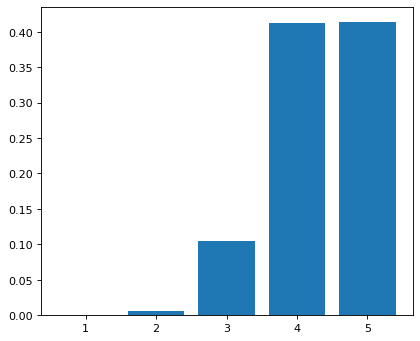

In [152]:
# 4) построим гистограмму
plt.figure(figsize=(6,5), dpi= 80)
plt.bar([1,2,3,4,5], d)

Как видим, 4 и 5 компоненты практически одинаково сильно оказывают влияние на решение, но поскольку 5 все же чуть больше, то за $b_m$ возьмем ее. 

In [153]:
bm = np.array([30. for y in range(n)])
bm[4] += 3
xm = np.linalg.solve(A, bm)

In [154]:
deltax = (max(abs(x-xm))) / (max(abs(x)))
deltax

0.41389655075509035

In [155]:
deltab = (max(abs(b-bm))) / (max(abs(b)))
deltab

0.1

In [156]:
np.linalg.cond(A)

102058007.01161169

In [157]:
print(deltax <= np.linalg.cond(A) * deltab)

True


In [158]:
deltax == d[4]

True

**Погрешности совпадают**

### Задание 3.4

Решить систему уравнений Ax=b из задачи 3.1, используя LU-разложение матрицы A.

In [93]:
# сделаем LU-разложение матрицы
def decompose_to_LU(a):
    lu_matrix = np.matrix(np.zeros([a.shape[0], a.shape[1]]))
    n = a.shape[0]

    for k in range(n):
        # вычисляем все остаточные элементы k-строки
        for j in range(k, n):
            lu_matrix[k, j] = a[k, j] - lu_matrix[k, :k] * lu_matrix[:k, j]
        # вычисляем все остаточные элементы k-столбца
        for i in range(k + 1, n):
            lu_matrix[i, k] = (a[i, k] - lu_matrix[i, : k] * lu_matrix[: k, k]) / lu_matrix[k, k]

    return lu_matrix


def get_L(m):
    L = m.copy()
    for i in range(L.shape[0]):
            L[i, i] = 1
            L[i, i+1 :] = 0
    return np.matrix(L)


def get_U(m):
    U = m.copy()
    for i in range(1, U.shape[0]):
        U[i, :i] = 0
    return U

In [94]:
LU = decompose_to_LU(A)
L = get_L(LU)
U = get_U(LU)
print(L, U, sep='\n\n')

[[1.         0.         0.         0.         0.        ]
 [0.34302326 1.         0.         0.         0.        ]
 [0.15012723 0.60538932 1.         0.         0.        ]
 [0.07603093 0.34345048 0.78801232 1.         0.        ]
 [0.04290909 0.20435904 0.53226481 0.99570406 1.        ]]

[[ 1.41242938e-02  4.84496124e-03  2.12044105e-03  1.07388316e-03
   6.06060606e-04]
 [ 0.00000000e+00 -5.88051217e-04 -3.55999928e-04 -2.01966472e-04
  -1.20173584e-04]
 [ 0.00000000e+00  0.00000000e+00  1.60434587e-05  1.26424432e-05
   8.53936844e-06]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.19792243e-07
  -1.19277623e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   3.24051818e-10]]


In [103]:
b = np.array([30. for y in range(n)])
c = np.linalg.solve(L, b)
c

array([30.        , 19.70930233, 13.56438203, 10.26100263,  7.24818797])

In [104]:
xlu = np.linalg.solve(U, c)
xlu

array([ 2.81598727e+06, -3.51110702e+08,  5.71302494e+09, -2.23569410e+10,
        2.23673733e+10])

In [107]:
print(x, '\n', xlu)

[ 2.81598727e+06 -3.51110702e+08  5.71302494e+09 -2.23569410e+10
  2.23673733e+10] 
 [ 2.81598727e+06 -3.51110702e+08  5.71302494e+09 -2.23569410e+10
  2.23673733e+10]


**Как мы видим, результаты совпадают с полученными нами ранее.**

### Задание 3.9.6 (3.5.6)

Решить систему уравнений Ax=b порядка n из задачи 3.5 методом Холецкого. Вычислить
число обусловленности матрицы A.

$ n = 25, m = 10 $

$$ b_i = i^2 - n $$

In [111]:
n = 25  # размерность
m = 10
A = np.matrix([[0. for y in range(n)] for x in range(n)])
for i in range(n):
    for j in range(n):
        if i == j:
            A[i,j] = n + m**2 + j/m + i/n
            continue
        A[i,j] = (i+j) / (m+n)
A

matrix([[1.25000000e+02, 2.85714286e-02, 5.71428571e-02, 8.57142857e-02,
         1.14285714e-01, 1.42857143e-01, 1.71428571e-01, 2.00000000e-01,
         2.28571429e-01, 2.57142857e-01, 2.85714286e-01, 3.14285714e-01,
         3.42857143e-01, 3.71428571e-01, 4.00000000e-01, 4.28571429e-01,
         4.57142857e-01, 4.85714286e-01, 5.14285714e-01, 5.42857143e-01,
         5.71428571e-01, 6.00000000e-01, 6.28571429e-01, 6.57142857e-01,
         6.85714286e-01],
        [2.85714286e-02, 1.25140000e+02, 8.57142857e-02, 1.14285714e-01,
         1.42857143e-01, 1.71428571e-01, 2.00000000e-01, 2.28571429e-01,
         2.57142857e-01, 2.85714286e-01, 3.14285714e-01, 3.42857143e-01,
         3.71428571e-01, 4.00000000e-01, 4.28571429e-01, 4.57142857e-01,
         4.85714286e-01, 5.14285714e-01, 5.42857143e-01, 5.71428571e-01,
         6.00000000e-01, 6.28571429e-01, 6.57142857e-01, 6.85714286e-01,
         7.14285714e-01],
        [5.71428571e-02, 8.57142857e-02, 1.25280000e+02, 1.42857143e-01,

In [113]:
b = np.array([i**2-n for i in range(n)])
b

array([-25, -24, -21, -16,  -9,   0,  11,  24,  39,  56,  75,  96, 119,
       144, 171, 200, 231, 264, 299, 336, 375, 416, 459, 504, 551])

In [118]:
L = np.linalg.cholesky(A)
L

matrix([[1.11803399e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [2.55550626e-03, 1.11865988e+01, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00],
        [5.11101252e-03, 7.66106175e-03, 1.11928511e+01, 0.00000000e+00,

In [120]:
y = np.linalg.solve(L, b)
y

array([-2.23606798e+00, -2.14491340e+00, -1.87370840e+00, -1.42306645e+00,
       -7.93883800e-01,  1.26671429e-02,  9.95146575e-01,  2.15185789e+00,
        3.48086008e+00,  4.97998165e+00,  6.64683605e+00,  8.47883829e+00,
        1.04732225e+01,  1.26270605e+01,  1.49372807e+01,  1.74006875e+01,
        2.00139811e+01,  2.27737772e+01,  2.56766258e+01,  2.87190311e+01,
        3.18974695e+01,  3.52084074e+01,  3.86483189e+01,  4.22137011e+01,
        4.59010903e+01])

In [121]:
x = np.linalg.solve(np.transpose(L), y)
x

array([-0.3326762 , -0.33098052, -0.31330826, -0.27969114, -0.23016078,
       -0.16474871, -0.08348641,  0.01359477,  0.12646352,  0.25508864,
        0.39943901,  0.55948358,  0.73519138,  0.92653154,  1.13347326,
        1.35598581,  1.59403856,  1.84760094,  2.11664249,  2.4011328 ,
        2.70104155,  3.0163385 ,  3.3469935 ,  3.69297646,  4.05425737])

**Решили систему линейных уравнений методом Холецкого.**

In [122]:
# число обусловленности матрицы
np.linalg.cond(A)

1.1675445172681724